# Intensivbetten Status
Eine Auswertung der Auslastung der ICU Kapazitäten mit aufschlüsselung nach Low, High und ECMO care in korrelation zu den Infektionszahlen.

In [2]:
import pandas as pd
import sqlalchemy as db
# Import Database and select necessary data
engine = db.create_engine('sqlite:///data.db')
conn = engine.connect()


In [3]:
# Read Cov19 cases seperated by Landkreis, Refdatum, Geschlecht
cov = pd.read_sql_query(
    "SELECT IdLandkreis, Refdatum, sum(AnzahlFall) as Fälle, SUM(AnzahlGenesen) as Genesen, SUM(AnzahlTodesfall) as Todesfall FROM covid c GROUP BY IdLandkreis, Altersgruppe, Geschlecht ORDER BY Refdatum;", conn)
# Print result
cov

,IdLandkreis,Refdatum,Fälle,Genesen,Todesfall
0,5962,2020-01-02,639,482,129
1,9190,2020-01-10,2450,2219,6
2,9162,2020-01-23,29100,24721,2
3,9181,2020-01-23,1746,1474,0
4,10041,2020-01-23,668,462,171
...,...,...,...,...,...
7486,9775,2022-01-12,1,0,0
7487,9779,2022-01-12,1,0,0
7488,10042,2022-01-12,1,0,0
7489,12070,2022-01-12,1,0,0


## Cov19 Cases

Auswertung der Covid19 Fallzahlen.
Um diensen Plot mit dem vollständigen Datensatz zu erstellen wird eine Maschine mit mehr als 64GB RAM und einer NVMe SSD (PCI Gen 3.1 oder höher) benötigt.
Die Ausführungszeit an meinem Rechner mit 32GB RAM überschreitet 60min.

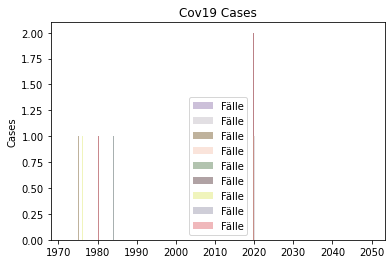

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plot = cov.drop(['Genesen', 'Todesfall'], axis=1)
plot = plot.dropna(subset=['Refdatum']).iloc[1:10]
# Convert to Date
plot["Refdatum"] = plot["Refdatum"].astype("datetime64")
plot = plot[plot['Refdatum'] > "2020-01-01"]
#print(plot)

ax = list()

# Split into Landkreis
for entity in plot['IdLandkreis']:
    tmp = plot[plot['IdLandkreis']==entity].drop(['IdLandkreis'], axis=1)
    ax.append(tmp)

kwargs = dict(alpha=0.5, bins=100)

for a in ax:
    col = (np.random.random(), np.random.random(), np.random.random())
    #print(a)
    plt.hist(a, **kwargs, color=[col,col], label='Fälle')

plt.gca().set(title='Cov19 Cases', ylabel='Cases')
#plt.xlim(50,75)
plt.legend();


## ICU Plot

In [4]:
# Read Cov19 cases seperated by Landkreis, Refdatum, Geschlecht
betten = pd.read_sql_query(
    "SELECT * FROM fallzahlen f GROUP BY datum, bundesland;", conn)
# Print result
betten

,id,datum,bundesland,gemeindeschluessel,anzahl_standorte,anzahl_meldebereiche,faelle_covid_aktuell,faelle_covid_aktuell_invasiv_beatmet,betten_frei,betten_belegt,betten_belegt_nur_erwachsen,betten_frei_nur_erwachsen
0,1,2020-04-24,1,1001,2,2,1,1,40,38,38,40
1,16,2020-04-24,2,2000,24,27,74,62,338,549,532,319
2,17,2020-04-24,3,3101,5,5,6,6,50,91,91,50
3,62,2020-04-24,4,4011,9,10,8,7,77,119,113,69
4,64,2020-04-24,5,5111,11,12,26,21,81,222,222,81
...,...,...,...,...,...,...,...,...,...,...,...,...
10075,249231,2022-01-13,12,12051,3,4,9,4,21,50,45,10
10076,249249,2022-01-13,13,13003,2,4,17,17,24,92,79,13
10077,249257,2022-01-13,14,14511,3,7,27,18,30,154,141,17
10078,249270,2022-01-13,15,15001,1,3,8,5,12,28,25,3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


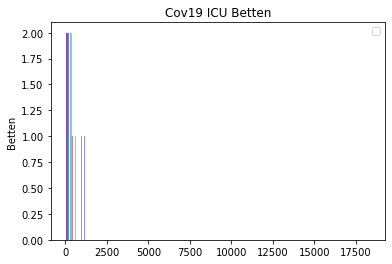

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plot = betten.drop(['anzahl_standorte', 'anzahl_meldebereiche', 'bundesland'], axis=1)
plot = plot.dropna(subset=['datum']).iloc[1:30]
# Convert to Date
plot["datum"] = plot["datum"].astype("datetime64")
plot = plot[plot['datum'] > "2020-01-01"]
#print(plot)

ax = list()

# Split into Landkreis
for entity in plot['gemeindeschluessel']:
    tmp = plot[plot['gemeindeschluessel']==entity].drop(['gemeindeschluessel'], axis=1)
    ax.append(tmp)

kwargs = dict(alpha=0.5, bins=100)

for a in ax:
    col = (np.random.random(), np.random.random(), np.random.random())
    #print(a)
    plt.hist(a, **kwargs, color=[col,col,col,col,col,col,col,col])

plt.gca().set(title='Cov19 ICU Betten', ylabel='Betten')
#plt.xlim(50,75)
plt.legend();